In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('type of the Diamond new.csv')

In [ ]:
df

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58
...,...,...,...,...,...,...,...,...,...,...
53935,Very Good,E,VS2,0.70,62.8,60.0,2755,5.59,3.53,5.65
53936,Very Good,D,VS1,0.70,63.1,59.0,2755,5.67,3.55,5.58
53937,Very Good,E,VS2,0.70,60.5,59.0,2757,5.71,3.47,5.76
53938,Very Good,E,VS2,0.70,61.2,59.0,2757,5.69,3.49,5.72


Признаки:
1. cut - тип огранки
2. color - цвет
3. clarity - чистота
4. carat - карат, вес
5. depth - глубина
6. table - плоская грань вверху брилианта
7. price - цена в $
8. x - ширина
9. y - длина
10. z - высота

#1. Предварительный анализ

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
from matplotlib import pyplot as plt

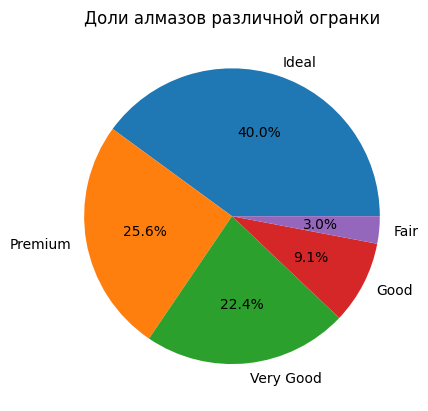

In [ ]:
cut_v=df['cut'].value_counts()
plt.pie(cut_v.values, labels=cut_v.index,autopct='%1.1f%%')
plt.title('Доли алмазов различной огранки')
plt.show()

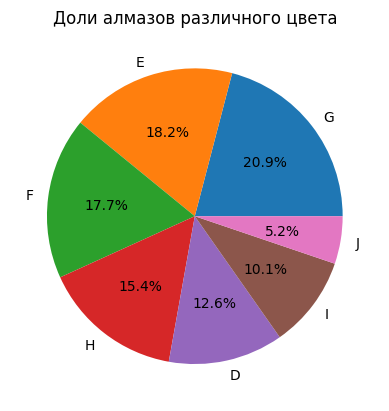

In [ ]:
color_v=df['color'].value_counts()
plt.pie(color_v.values, labels=color_v.index,autopct='%1.1f%%')
plt.title('Доли алмазов различного цвета')
plt.show()

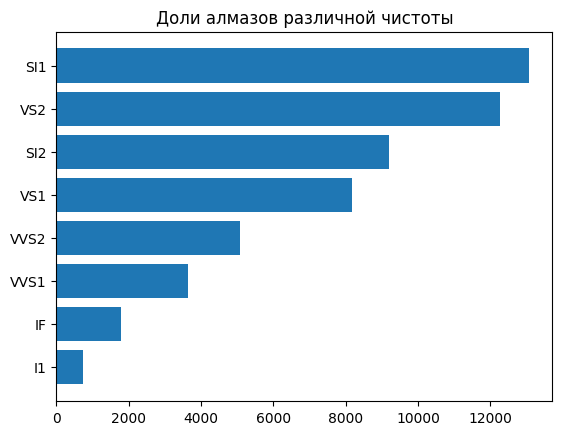

In [ ]:
clarity_v=df['clarity'].value_counts()[::-1]
plt.barh(clarity_v.index, clarity_v.values)
plt.title('Доли алмазов различной чистоты')
plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
cols=['carat','depth','table','price']

In [ ]:
for i in cols:
  print(i, stats.normaltest(df[i]))

carat NormaltestResult(statistic=8926.737827502262, pvalue=0.0)
depth NormaltestResult(statistic=6613.70177994449, pvalue=0.0)
table NormaltestResult(statistic=8034.751738354142, pvalue=0.0)
price NormaltestResult(statistic=15096.649759774145, pvalue=0.0)


По критерию Д'Агостино распределения признаков carat, depth, table, price не вляются нормальными

#2. Сравнение групп
Так как распределения не являются нормальными, используются непараметричекие критерии сравнения групп

In [ ]:
df.groupby('cut')[['price']].mean()

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


In [ ]:
import seaborn as sns

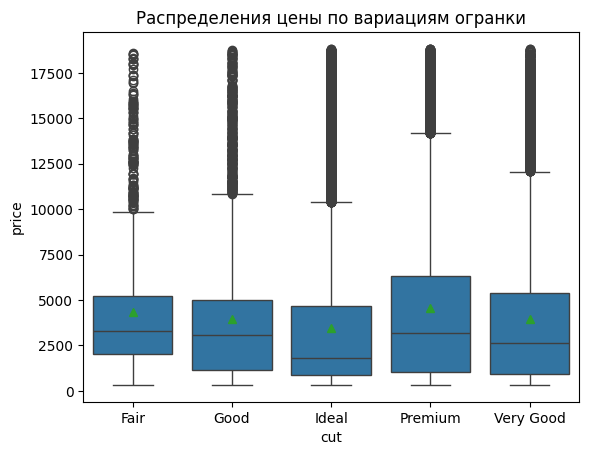

In [ ]:
sns.boxplot(data=df, x='cut', y='price', showmeans=True)
plt.title('Распределения цены по вариациям огранки')
plt.show()

Довольно много выбросов по цене, нужно обработать эти выбросы.

In [ ]:
df['price'].describe()

,price
count,53940.000000
mean,3932.799722
std,3989.439738
min,326.000000
25%,950.000000
50%,2401.000000
75%,5324.250000
max,18823.000000


In [ ]:
p_89=df['price'].quantile(q=0.89)
p_89

9314.0

In [ ]:
clear_price=df[df['price']<=p_89]['price']

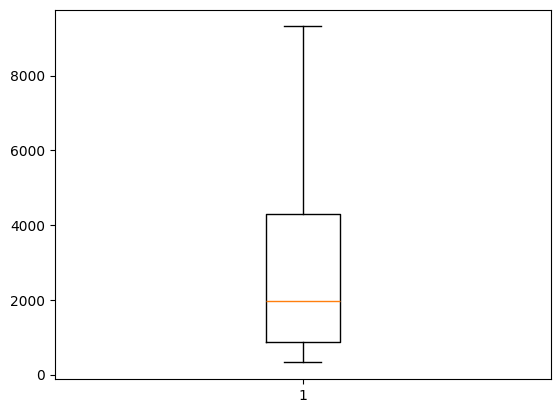

In [ ]:
plt.boxplot(clear_price)
plt.show()

In [ ]:
clear_df=df[df['price']<=p_89]

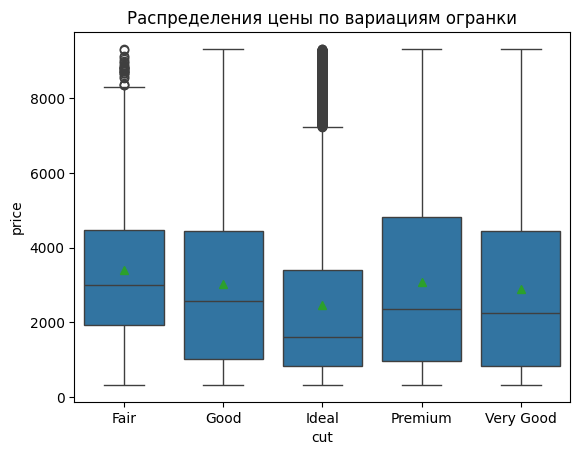

In [ ]:
sns.boxplot(data=clear_df, x='cut', y='price', showmeans=True)
plt.title('Распределения цены по вариациям огранки')
plt.show()

Проверим с помощью критерия Краскела-Уоллиса, есть ли зависисмость между типом огранки и ценой.

Рассмотрим датасеты с выбросами и очищенный.

In [ ]:
stats.kruskal(df[df['cut']=='Fair']['price'],df[df['cut']=='Good']['price'],df[df['cut']=='Ideal']['price'],
              df[df['cut']=='Premium']['price'],df[df['cut']=='Very Good']['price'])

KruskalResult(statistic=978.6208219359503, pvalue=1.533414952159139e-210)

In [ ]:
stats.kruskal(clear_df[clear_df['cut']=='Fair']['price'],clear_df[clear_df['cut']=='Good']['price'],clear_df[clear_df['cut']=='Ideal']['price'],
              clear_df[clear_df['cut']=='Premium']['price'],clear_df[clear_df['cut']=='Very Good']['price'])

KruskalResult(statistic=922.0307438151881, pvalue=2.806883149556259e-198)

P-value < a, при уровне значимости a, следовательно существуют статистически значимые отличия по крйней мере для одного типа огранки.

Проверим зависимость между цветом алмаза и ценой

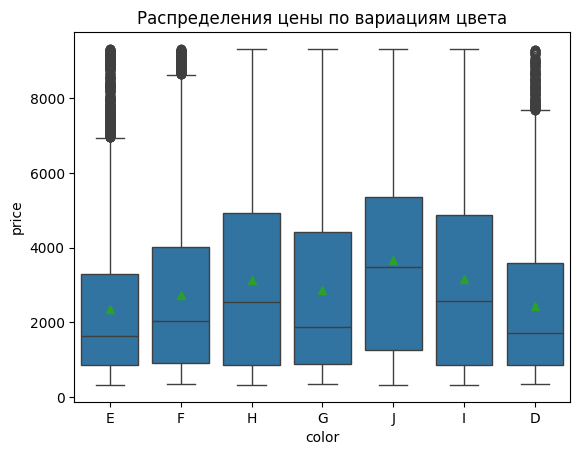

In [ ]:
sns.boxplot(data=clear_df, x='color', y='price', showmeans=True)
plt.title('Распределения цены по вариациям цвета')
plt.show()

In [ ]:
stats.kruskal(df[df['color']=='E']['price'],df[df['color']=='F']['price'],df[df['color']=='H']['price'],df[df['color']=='G']['price'],
              df[df['color']=='J']['price'], df[df['color']=='I']['price'], df[df['color']=='D']['price'])

KruskalResult(statistic=1335.570626350983, pvalue=2.1580813998043093e-285)

In [ ]:
stats.kruskal(clear_df[clear_df['color']=='E']['price'],clear_df[clear_df['color']=='F']['price'],clear_df[clear_df['color']=='H']['price'],
              clear_df[clear_df['color']=='G']['price'],clear_df[clear_df['color']=='J']['price'], clear_df[clear_df['color']=='I']['price'],
              clear_df[clear_df['color']=='D']['price'])

KruskalResult(statistic=710.2266561651539, pvalue=3.787834964298273e-150)

Снова видим что существуют статистически значимые отличия для разных цветов

Аналогично проверим чистоту

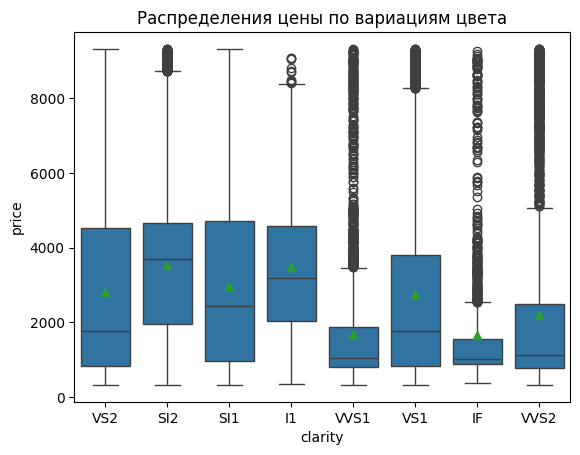

In [ ]:
sns.boxplot(data=clear_df, x='clarity', y='price', showmeans=True)
plt.title('Распределения цены по вариациям чистоты')
plt.show()

In [ ]:
stats.kruskal(clear_df[clear_df['clarity']=='SI1']['price'],clear_df[clear_df['clarity']=='VS2']['price'],clear_df[clear_df['clarity']=='SI2']['price'],
              clear_df[clear_df['clarity']=='IF']['price'],clear_df[clear_df['clarity']=='VVS1']['price'],clear_df[clear_df['clarity']=='VVS2']['price'])

KruskalResult(statistic=2934.3326996161572, pvalue=0.0)

Статистически значимые отличия есть

Путём анализа с применением критериев сравенения групп была выявлена зависимость цены от огранки, цвета и чистоты

#3. Корреляционный анализ

Проверим корреляцию количественных признаков

In [ ]:
clear_df[['carat','depth','table','price','x (Premium)','z (Very Good)','y (Good)']].corr()

,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
carat,1.000000,0.059509,0.190061,0.922585,0.982154,0.953781,0.972894
depth,0.059509,1.000000,-0.291148,0.020840,-0.007707,0.128659,-0.011329
table,0.190061,-0.291148,1.000000,0.139836,0.197351,0.145480,0.187811
price,0.922585,0.020840,0.139836,1.000000,0.907390,0.878046,0.901638
x (Premium),0.982154,-0.007707,0.197351,0.907390,1.000000,0.960924,0.989205
z (Very Good),0.953781,0.128659,0.145480,0.878046,0.960924,1.000000,0.953840
y (Good),0.972894,-0.011329,0.187811,0.901638,0.989205,0.953840,1.000000


Построим тепловую карту

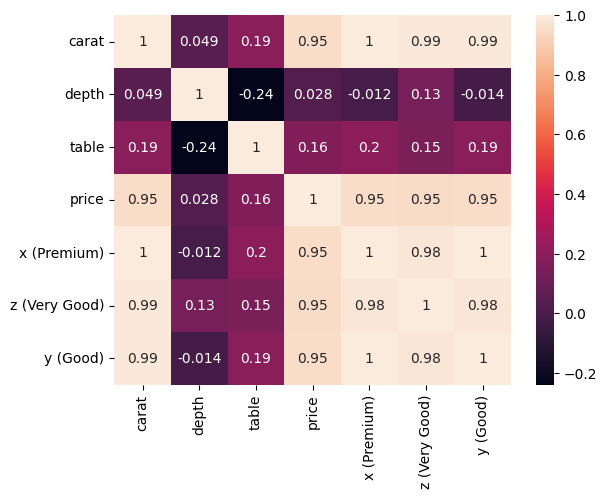

In [ ]:
hm = sns.heatmap(clear_df[['carat','depth','table','price','x (Premium)','z (Very Good)','y (Good)']].corr(method='spearman'), annot=True)
plt.show()

Корреляция есть между: carat, price, x, y, z.

depth и table ни с чем не коррелируют

Проверим корреляцию каегориальных переменных.

In [ ]:
cut_color=pd.crosstab(clear_df['cut'],clear_df['color'])

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(cut_color)
p

6.12517874922953e-39

Статистически значимая связь между cut и color есть

In [ ]:
n = cut_color.sum().sum()

In [ ]:
import numpy as np

In [ ]:
cramers_v = np.sqrt(chi2 / (n * (min(cut_color.shape) - 1)))

In [ ]:
cramers_v

0.03587335040217613

Связь очень незначительна

In [ ]:
cut_clarity=pd.crosstab(clear_df['cut'],clear_df['clarity'])
chi2, p, dof, expected = stats.chi2_contingency(cut_clarity)
print('p-value:',p)

p-value: 0.0


In [ ]:
n = cut_clarity.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(cut_clarity.shape) - 1)))
cramers_v

0.10101608380580884

Связь между огранкой и чистотой очень мала

In [ ]:
color_clarity=pd.crosstab(clear_df['color'],clear_df['clarity'])
chi2, p, dof, expected = stats.chi2_contingency(color_clarity)
print('p-value:',p)

p-value: 0.0


In [ ]:
n = color_clarity.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(color_clarity.shape) - 1)))
cramers_v

0.08247928704615155

Степень взаимосвязи между цветом и чистотой опять же очень мала

#4. Регрессионный анализ

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

Построим для начала парную регрессию

In [ ]:
model1=lr.fit(clear_df[['carat']], clear_df[['price']])

In [ ]:
model1.intercept_, model1.coef_

(array([-1343.23346968]), array([[6026.65197939]]))

In [ ]:
r2=model1.score(clear_df[['carat']], clear_df[['price']])
r2

0.8511634487505579

Метрика качества (коэффициент детерминации) близок к 1, модель мможно считать адекватной

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
res_model1= smf.ols('price ~ carat', data=clear_df).fit()
res_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 2.745e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:06:01   Log-Likelihood:            -3.9340e+05
No. Observations:               48008   AIC:                         7.868e+05
Df Residuals:                   48006   BIC:                         7.868e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1343.2335      8.848   -151.811      0.000   -1360.576   -1325.891
carat       6026.6520     11.502    523.962      0.000    6004.108    6049.196
==============================================================================
Omnibus:                    10257.464   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94615.360
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                       9.704   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

По критерию фишера модель является адекватной. Свободный член ≈ -1343.2, коэфициент перед фактором ≈ 6026.6. По p-value для статистики стьюдента видно, что оба коэффициента значимы для модели. По критерию Дарбина-Уотсона видно, что остатки положительно автокоррелированы. По критерию Жарка-Бера делаем вывод, что днные распределены не нормально.

Множественная регрессия

Так как регрессия работает с числами, то закодируем категориальные переменные

In [ ]:
color_map={'D' : 7,'E' : 6,'F' : 5,'G' : 4,'H' : 3,'I' : 2,'J' : 1}
cut_map={'Ideal' : 5, 'Premium' : 4,'Very Good' : 3,'Good' : 2,'Fair' : 1}
clarity_map={'IF' : 8,'VVS1' : 7,'VVS2' : 6,'VS1' : 5,'VS2' : 4,'SI1' : 3,'SI2' : 2,'I1' : 1}

In [ ]:
clear_df['cut_encoded']=clear_df['cut'].map(cut_map)
clear_df['color_encoded']=clear_df['color'].map(color_map)
clear_df['clarity_encoded']=clear_df['clariy'].map(clarity_map)

In [ ]:
clear_df

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good),cut_encoded,clarity_encoded,color_encoded
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78,1,4,6
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33,1,2,6
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95,1,2,5
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53,1,4,5
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,Very Good,E,VS2,0.70,62.8,60.0,2755,5.59,3.53,5.65,3,4,6
53936,Very Good,D,VS1,0.70,63.1,59.0,2755,5.67,3.55,5.58,3,5,7
53937,Very Good,E,VS2,0.70,60.5,59.0,2757,5.71,3.47,5.76,3,4,6
53938,Very Good,E,VS2,0.70,61.2,59.0,2757,5.69,3.49,5.72,3,4,6


In [ ]:
x=clear_df[['carat','cut_encoded','color_encoded','clarity_encoded','depth','table']]

признаки x, y, z не включаем в модель, так как видно, что они коррелируют с carat.

In [ ]:
y=clear_df[['price']]

In [ ]:
model2=lr.fit(x,y)

Можно предсказать цену для какого-нибудь алмаза

In [ ]:
diamond=[[3.0, 4, 6, 7, 60.0, 55.0]]
diamond_price=model2.predict(diamond)
diamond_price

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[20105.75933394]])

In [ ]:
res_model2=smf.ols('price ~ carat + cut_encoded + color_encoded + clarity_encoded + depth + table ', data=clear_df).fit()
res_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 7.639e+04
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:02:37   Log-Likelihood:            -3.8257e+05
No. Observations:               48008   AIC:                         7.652e+05
Df Residuals:                   48001   BIC:                         7.652e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2392.9992    233.029    -10.269      0.000   -2849.738   -1936.260
carat            6937.4288     10.756    644.996      0.000    6916.347    6958.510
cut_encoded        78.4346      3.468     22.614      0.000      71.636      85.233
color_encoded     185.5634      1.993     93.089      0.000     181.656     189.470
clarity_encoded   309.2314      2.191    141.123      0.000     304.937     313.526
depth             -21.7742      2.567     -8.481      0.000     -26.806     -16.742
table             -10.8876      1.796     -6.064      0.000     -14.407      -7.368
==============================================================================
Omnibus:                     8206.453   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           175427.818
Skew:                           0.151   Prob(JB):                         0.00
Kurtosis:                      12.360   Cond. No.                     6.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Мы можем видеть что некоторые признаки коллинеарны, попробуем убрать некоторые

In [ ]:
res_model2=smf.ols('price ~ carat + cut_encoded + color_encoded + clarity_encoded', data=clear_df).fit()
res_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.144e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:07:11   Log-Likelihood:            -3.8261e+05
No. Observations:               48008   AIC:                         7.652e+05
Df Residuals:                   48003   BIC:                         7.653e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4424.6256     21.690   -203.996      0.000   -4467.138   -4382.113
carat            6930.8488     10.701    647.703      0.000    6909.875    6951.822
cut_encoded        93.3395      2.910     32.080      0.000      87.637      99.042
color_encoded     186.2681      1.992     93.495      0.000     182.363     190.173
clarity_encoded   310.4506      2.188    141.883      0.000     306.162     314.739
==============================================================================
Omnibus:                     8216.779   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177249.778
Skew:                           0.144   Prob(JB):                         0.00
Kurtosis:                      12.409   Cond. No.                         54.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Модель адекватна, так как коэффициент детерминации стремится к 1 (0.905) и p-value для F-статистики меньше уровня значимости. Также в модели значимы все коэффициенты и свободный член. Остатки немного положительно коррелируют. Данные распределены не нормально.